# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [3]:
data = np.array(data)
m, n = data.shape
print(m,n)

19999 785


# Checking dataset

In [4]:
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [5]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
print(Y_train)

[3 4 1 ... 0 4 2]


# Parameter initialization and activation function

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

In [9]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Creating forward propagation, backward propagation, and updating parameters

In [10]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# Prediction, Accuracy and Gradient Descent

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

# Training

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.18, 250)

Iteration:  0
[3 3 3 ... 3 3 3] [3 4 1 ... 0 4 2]
0.10432128006737197
Iteration:  10
[3 7 1 ... 0 7 2] [3 4 1 ... 0 4 2]
0.25806621401126373
Iteration:  20
[3 7 1 ... 0 9 2] [3 4 1 ... 0 4 2]
0.3568082530659508
Iteration:  30
[3 9 1 ... 0 9 2] [3 4 1 ... 0 4 2]
0.4319701036896679
Iteration:  40
[3 9 1 ... 0 9 2] [3 4 1 ... 0 4 2]
0.4769198378862045
Iteration:  50
[3 9 1 ... 0 9 2] [3 4 1 ... 0 4 2]
0.5193431233222802
Iteration:  60
[3 9 1 ... 0 9 2] [3 4 1 ... 0 4 2]
0.563555976630349
Iteration:  70
[3 9 1 ... 0 9 2] [3 4 1 ... 0 4 2]
0.6049792094320754
Iteration:  80
[3 9 1 ... 0 9 2] [3 4 1 ... 0 4 2]
0.6512448023580188
Iteration:  90
[3 4 1 ... 0 4 2] [3 4 1 ... 0 4 2]
0.6844570766882467
Iteration:  100
[3 4 1 ... 0 4 2] [3 4 1 ... 0 4 2]
0.7086162429601558
Iteration:  110
[3 4 1 ... 0 4 2] [3 4 1 ... 0 4 2]
0.7266698247276172
Iteration:  120
[3 4 1 ... 0 4 2] [3 4 1 ... 0 4 2]
0.7420916890362651
Iteration:  130
[3 4 1 ... 0 4 2] [3 4 1 ... 0 4 2]
0.7545133954418654
Iteration:  140


# Testing

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


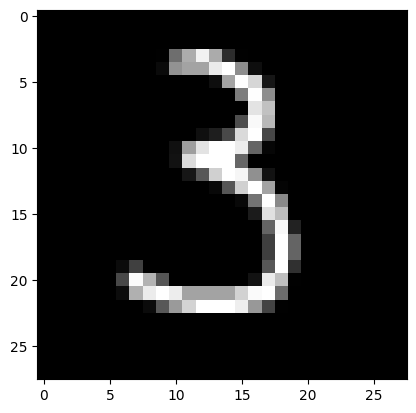

In [14]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [4]
Label:  4


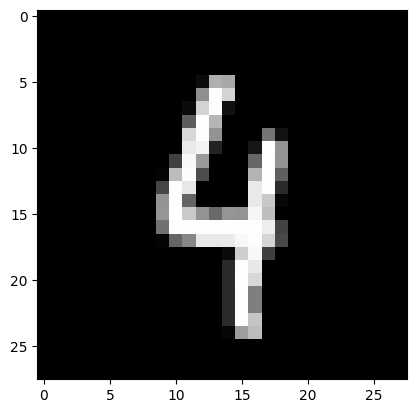

In [15]:
test_prediction(1, W1, b1, W2, b2)

In [18]:
# testing accuracy
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

In [23]:
get_accuracy(dev_predictions, Y_dev)

[8 7 9 7 0 0 3 8 6 5 3 0 7 5 5 0 1 9 8 6 6 2 1 1 5 3 4 9 0 5 7 2 4 8 3 2 7
 2 4 9 0 5 7 6 9 1 4 3 4 8 3 1 3 4 9 2 1 3 6 2 8 3 1 8 2 9 9 3 8 8 0 2 7 6
 6 4 9 6 1 1 3 9 9 4 1 7 4 6 6 1 8 7 7 4 9 4 0 7 1 7 1 5 1 3 3 4 9 3 6 0 0
 0 9 9 1 7 2 5 5 6 0 1 2 5 4 4 4 0 5 0 1 4 4 8 8 8 5 1 6 9 0 4 4 9 2 0 3 7
 7 9 9 0 7 7 9 0 2 7 4 3 7 2 9 9 7 5 3 9 1 8 1 5 0 6 1 6 1 0 6 4 2 4 0 5 3
 1 4 1 7 4 9 9 9 0 6 3 6 1 2 9 3 3 7 8 2 6 9 3 8 0 6 8 0 4 7 0 0 9 4 9 9 5
 1 2 7 0 7 9 2 8 2 5 4 9 8 1 2 0 7 4 2 9 0 9 4 4 2 7 6 0 6 3 0 2 6 9 2 9 4
 7 8 5 6 4 5 8 1 3 5 4 6 4 0 2 3 2 9 7 9 5 0 4 1 7 7 5 9 9 3 9 3 4 8 1 3 8
 4 7 8 0 4 6 3 0 1 5 9 7 6 0 4 1 4 9 7 4 7 3 3 2 5 6 4 7 0 8 8 3 8 7 0 8 7
 7 9 3 7 6 0 1 7 9 3 0 2 5 4 8 9 0 7 8 0 5 1 2 4 7 8 6 2 5 0 5 2 5 2 9 3 9
 4 2 3 0 9 3 1 0 0 4 3 3 8 4 1 1 7 8 4 7 7 9 6 7 0 1 9 4 1 1 7 7 0 1 5 3 0
 1 6 6 1 6 1 1 0 4 4 2 0 1 1 2 2 1 3 3 2 0 0 2 8 3 1 5 8 6 0 0 3 9 0 7 2 5
 7 7 0 6 7 1 1 5 3 0 6 7 5 9 7 2 6 0 7 3 7 4 2 0 1 6 3 9 7 3 0 3 6 4 3 2 8
 3 6 1 1 4 5 2 4 0 4 0 5 

0.833